In [1]:
import sys
sys.path.append("gpib_instrument_control")
import hp_3478a
import hp_8700_series_vna
import numpy as np
import time
import yig_controller_test
import matplotlib.pyplot as plt
import scipy.io as sio
import skrf.network
import yig_controller_test
import yig_filter_model

plt.rcParams['figure.figsize'] = [15, 10]

#Instruments and devices
yigControllerPort='/dev/ttyUSB0'
vna = hp_8700_series_vna.Hp8753A()
curMeter = hp_3478a.Hp3478A()
yc = yig_controller_test.YigController(yigControllerPort)

Waiting for init... Done


In [13]:
def dB(data):
    return 20*np.log10(np.abs(data))


def fsweep(frequencies, span):
    vna.setPoints(201)
    filterMap=None
    spanMap=None
    #print(frequencies[0])
    #yc.tune(frequencies[0])
    #vna.setStartFrequency(frequencies[0]-span)
    #vna.setStopFrequency(frequencies[0]+span)
    #spar=vna.readSParameter('S21')
    #time.sleep(1)
    for fr in frequencies:
        yc.tune(fr)
        vna.setStartFrequency(fr-span)
        vna.setStopFrequency(fr+span)
        spar=vna.readSParameter('S21')
        fax = vna.frequencies()
        spanMap = yig_controller_test.stackVector(spanMap, fax)
        dePar=fix.deembedFrom(fax, spar)
        filterMap=yig_controller_test.stackVector(filterMap, dePar)
    return filterMap, spanMap

calMeas = skrf.network.Network('cal_through.s2p')

fix = yig_filter_model.SimpleS21Fixture(calMeas.f, calMeas.s[:, 1, 0])

yc.yigB.set(0,0)
yc.yigA.set(6,0)
yc.yigB.set(7,0)


In [19]:

wideSweepMap, wideSweepSpanMap= fsweep(np.linspace(.6e9, 16e9, 101), 250e6)


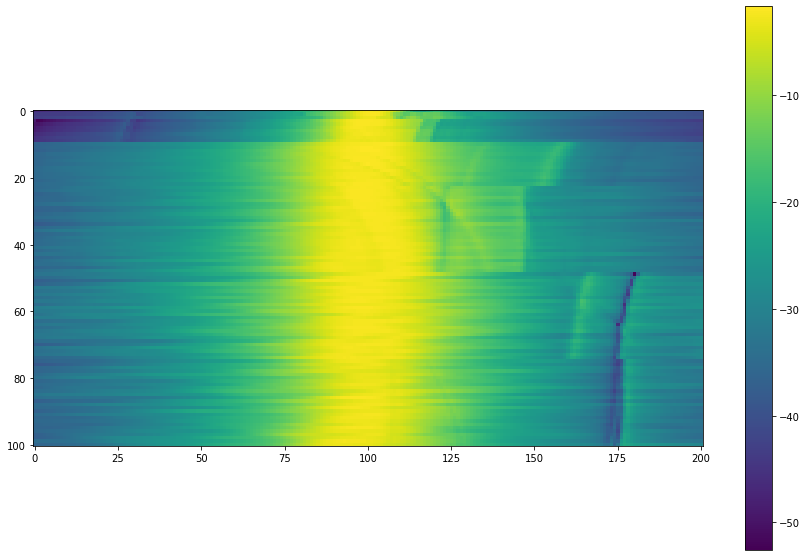

In [20]:
plt.figure()
plt.imshow(20*np.log10(np.abs(wideSweepMap+0.0001)))
plt.colorbar()
plt.show()


In [21]:
narrowSweepMap, narrowSweepSpanMap = fsweep(np.linspace(.6e9, 16e9, 101), 50e6)

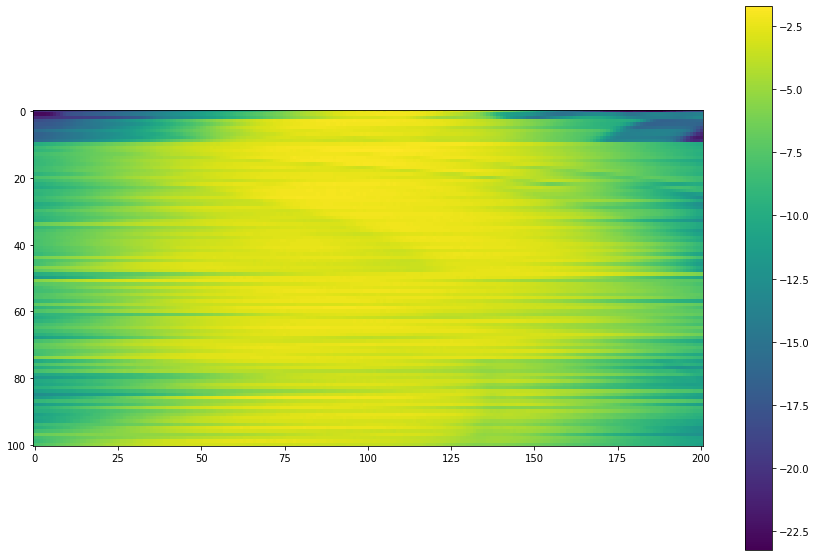

In [22]:
plt.figure()
plt.imshow(20*np.log10(np.abs(narrowSweepMap)))
plt.colorbar()
plt.show()

In [24]:
sf = np.linspace(.6e9, 16e9, 101)
np.random.shuffle(sf)
narrowRandSweepMap, narrowRandSweepSpanMap = fsweep(sf, 50e6)

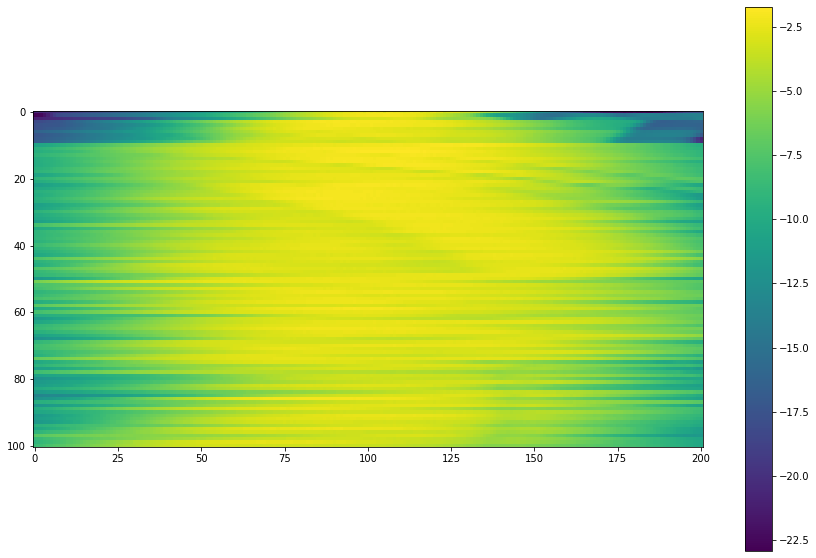

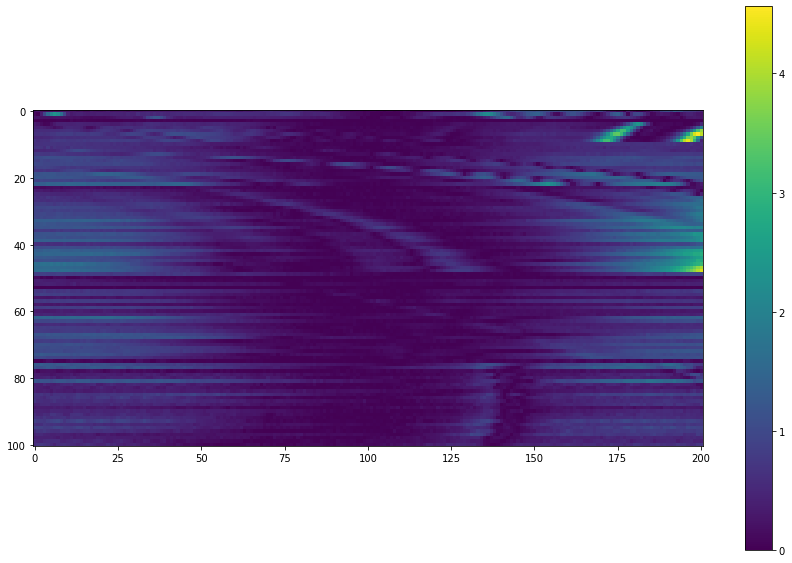

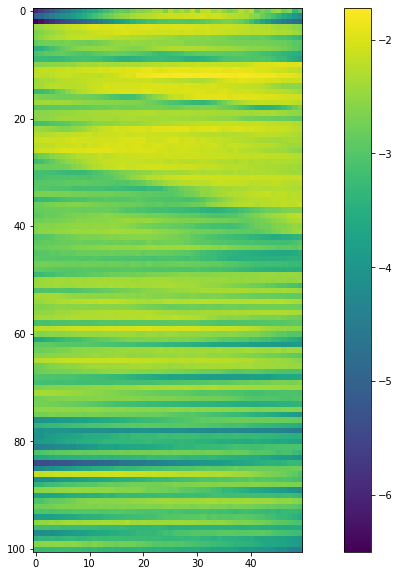

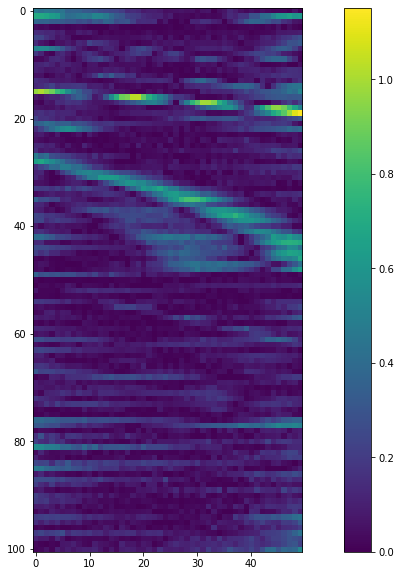

In [26]:
idx = np.argsort(sf)
plt.figure()
plt.imshow(20*np.log10(np.abs(narrowRandSweepMap[idx,:])))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(narrowRandSweepMap[idx,:])-dB(narrowSweepMap)))
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(20*np.log10(np.abs(narrowRandSweepMap[idx,75:125])))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(narrowRandSweepMap[idx,75:125])-dB(narrowSweepMap[:,75:125])))
plt.colorbar()
plt.show()

In [5]:
longSweepMap, longSweepSpanMap = fsweep(np.linspace(.6e9, 16e9, 154*4+1), 50e6)

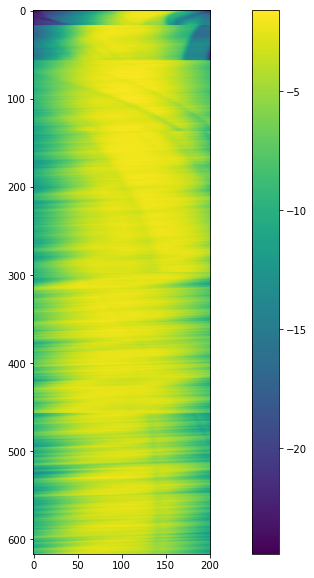

In [7]:
plt.figure()
plt.imshow(dB(longSweepMap))
plt.colorbar()
plt.show()


In [9]:
longSweepMap2, longSweepSpanMap2 = fsweep(np.linspace(.6e9, 16e9, 154*4+1), 50e6)

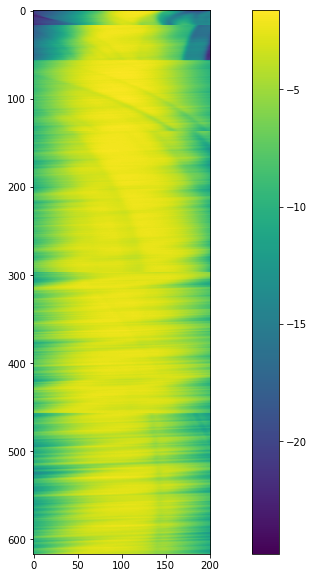

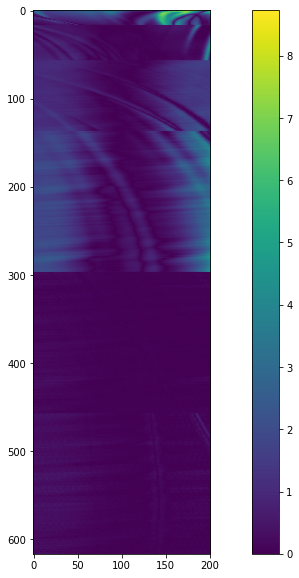

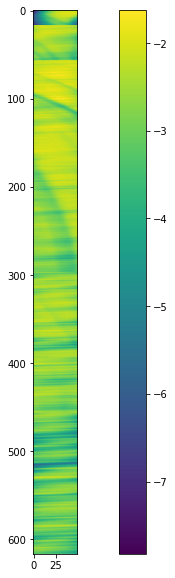

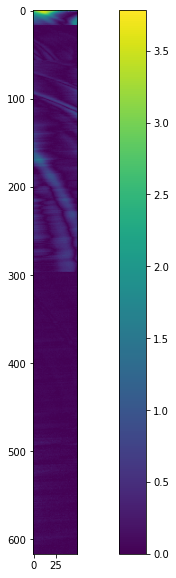

In [18]:
plt.figure()
plt.imshow(dB(longSweepMap2))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(longSweepMap2)-dB(longSweepMap)))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(dB(longSweepMap2[:,75:125]))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(abs(dB(longSweepMap2[:,75:125])-dB(longSweepMap[:,75:125])))
plt.colorbar()
plt.show()